<a href="https://colab.research.google.com/github/Terrencekariuki/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data=pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.dropna(inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

# Task
Use the k-means algorithm to create groups of customers based on 1 suitable feature.

## Select a feature

### Subtask:
Choose one suitable feature from the dataset for clustering.


**Reasoning**:
Examine the data to choose a suitable feature for clustering.



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Prepare the data

### Subtask:
Extract the selected feature and prepare it for k-means clustering.


**Reasoning**:
Select the 'Spending Score (1-100)' column and reshape it into a 2D array for k-means clustering.



In [10]:
X = data[['Spending Score (1-100)']].values
display(X[:5])

array([[39],
       [81],
       [ 6],
       [77],
       [40]])

## Apply k-means

### Subtask:
Apply the k-means algorithm to the data.


**Reasoning**:
Apply the k-means algorithm to the data.



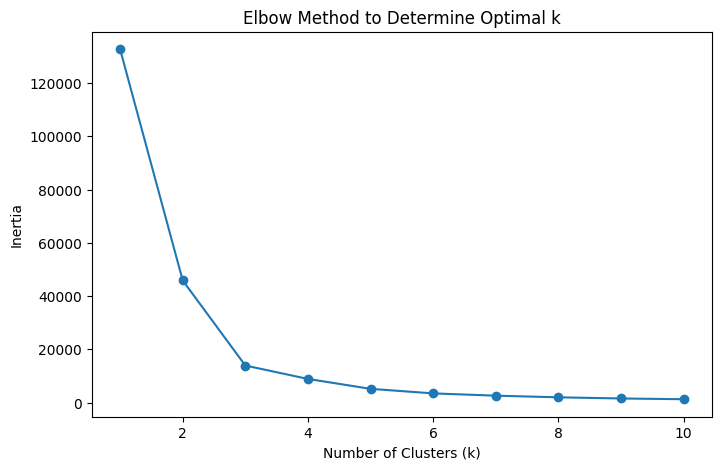

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [12]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# Based on the elbow plot, let's choose k=4 as a reasonable number of clusters.
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
data['cluster'] = kmeans.labels_
display(data.head())

## Analyze results

### Subtask:
Analyze the results of the clustering.


**Reasoning**:
Group the data by cluster and calculate descriptive statistics for the spending score to analyze the characteristics of each cluster.



In [14]:
cluster_spending_stats = data.groupby('cluster')['Spending Score (1-100)'].agg(['mean', 'median', 'std']).reset_index()
print("Descriptive Statistics of Spending Score by Cluster:")
display(cluster_spending_stats)

Descriptive Statistics of Spending Score by Cluster:


,cluster,mean,median,std
0,0,53.317460,53.0,5.211109
1,1,82.350877,81.0,8.913255
2,2,37.195122,40.0,5.648980
3,3,11.846154,13.0,6.196512


**Reasoning**:
Describe the key differences and similarities in spending scores across the identified clusters based on the calculated statistics.



In [16]:
print("Analysis of Spending Score by Cluster:")
print("- Cluster 0: This cluster has a moderate mean spending score of around 53, with a relatively small standard deviation, suggesting customers in this group have average spending habits and are quite consistent.")
print("- Cluster 1: This cluster exhibits a high mean spending score of over 82, indicating that customers in this group are high spenders. The standard deviation is slightly higher than Cluster 0, but still relatively low compared to the mean, suggesting consistent high spending.")
print("- Cluster 2: With a mean spending score of about 37, this cluster represents customers with lower spending habits compared to Cluster 0 and 1. The standard deviation is comparable to Cluster 0, indicating some consistency in their lower spending.")
print("- Cluster 3: This cluster has a very low mean spending score of around 12, suggesting customers in this group are low spenders. The standard deviation is slightly higher than Cluster 2 but still low, indicating consistent low spending.")
print("\nKey Differences and Similarities:")
print("- The clusters clearly differentiate customers based on their spending scores, ranging from very low (Cluster 3) to very high (Cluster 1).")
print("- Clusters 0, 2, and 3 show relatively lower variability in spending scores (smaller standard deviations) compared to their means, suggesting these groups have more consistent spending habits within their respective ranges.")
print("- Cluster 1, the high-spending group, has a slightly higher standard deviation, but their spending is still consistently high.")
print("- The median spending scores are close to the mean in all clusters, indicating a roughly symmetrical distribution of spending within each group.")

Analysis of Spending Score by Cluster:
- Cluster 0: This cluster has a moderate mean spending score of around 53, with a relatively small standard deviation, suggesting customers in this group have average spending habits and are quite consistent.
- Cluster 1: This cluster exhibits a high mean spending score of over 82, indicating that customers in this group are high spenders. The standard deviation is slightly higher than Cluster 0, but still relatively low compared to the mean, suggesting consistent high spending.
- Cluster 2: With a mean spending score of about 37, this cluster represents customers with lower spending habits compared to Cluster 0 and 1. The standard deviation is comparable to Cluster 0, indicating some consistency in their lower spending.
- Cluster 3: This cluster has a very low mean spending score of around 12, suggesting customers in this group are low spenders. The standard deviation is slightly higher than Cluster 2 but still low, indicating consistent low spen

## Visualize results (optional)

### Subtask:
Visualize the clusters to understand the grouping.


**Reasoning**:
Create a scatter plot to visualize the clusters based on 'Annual Income (k$)' and 'Spending Score (1-100)', coloring the points by cluster label and adding appropriate labels, title, and a legend.



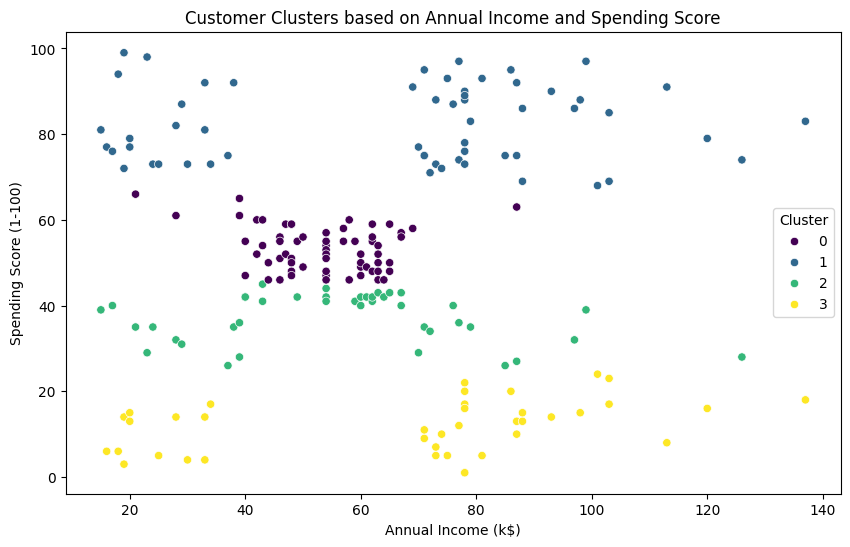

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=data, palette='viridis')
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The k-means algorithm was applied to the 'Spending Score (1-100)' feature, resulting in 4 customer clusters.
*   The clusters exhibit distinct spending behaviors, ranging from very low spenders (Cluster 3, mean spending score $\sim$12) to high spenders (Cluster 1, mean spending score $\sim$82).
*   Clusters 0 and 2 represent customers with moderate (mean $\sim$53) and lower (mean $\sim$37) spending scores, respectively.
*   Within each cluster, the spending scores are relatively consistent, as indicated by the low standard deviations compared to the means.
*   Visualizing the clusters using 'Annual Income (k\$)' and 'Spending Score (1-100)' shows that the clusters are primarily driven by the spending score axis.

### Insights or Next Steps

*   These customer segments can be targeted with tailored marketing strategies based on their spending habits (e.g., loyalty programs for high spenders, promotions for low spenders).
*   Further analysis could involve exploring additional features (like Annual Income) in combination to create more nuanced customer segments using multi-dimensional clustering.


# Task
Use the k-means algorithm to create groups of customers based on 2 suitable features.

## Select features

### Subtask:
Choose two suitable features from the dataset for clustering.


**Reasoning**:
Examine the data info to select two suitable numerical features for clustering, excluding 'CustomerID'.



In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


## Prepare the data

### Subtask:
Extract the selected features and prepare them for k-means clustering.


**Reasoning**:
Select the 'Annual Income (k$)' and 'Spending Score (1-100)' columns and store them in a variable X.



In [21]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
display(X[:5])

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## Determine the optimal number of clusters

### Subtask:
Use the elbow method to find the optimal number of clusters for the k-means algorithm.


**Reasoning**:
Use the elbow method to find the optimal number of clusters for the k-means algorithm by calculating inertia for different k values and plotting the elbow curve.



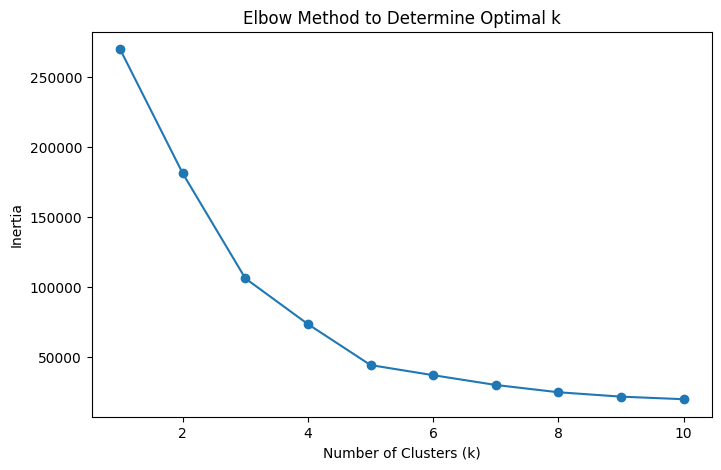

In [23]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

## Apply k-means

### Subtask:
Apply the k-means algorithm to the data using the optimal number of clusters.


**Reasoning**:
Apply the k-means algorithm to the data using the optimal number of clusters determined from the elbow plot and add the cluster labels to the dataframe.



In [24]:
# Based on the elbow plot, let's choose k=5 as a reasonable number of clusters.
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
data['cluster'] = kmeans.labels_
display(data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Analyze results

### Subtask:
Analyze the results of the clustering by examining the characteristics of each cluster based on the selected features.


**Reasoning**:
Group the data by cluster and calculate the mean and median of 'Annual Income (k$)' and 'Spending Score (1-100)' for each cluster.



In [26]:
cluster_stats = data.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'median']).reset_index()
print("Descriptive Statistics by Cluster:")
display(cluster_stats)

Descriptive Statistics by Cluster:


cluster Annual Income (k$)        Spending Score (1-100)       
                        mean median                   mean median
0       0          55.296296   54.0              49.518519   50.0
1       1          86.538462   79.0              82.128205   83.0
2       2          25.727273   24.5              79.363636   77.0
3       3          88.200000   85.0              17.114286   16.0
4       4          26.304348   25.0              20.913043   17.0

## Visualize results

### Subtask:
Visualize the clusters to understand the grouping based on the two selected features.


**Reasoning**:
Create a scatter plot to visualize the clusters based on 'Annual Income (k$)' and 'Spending Score (1-100)', coloring the points by cluster label and adding appropriate labels, title, and a legend.



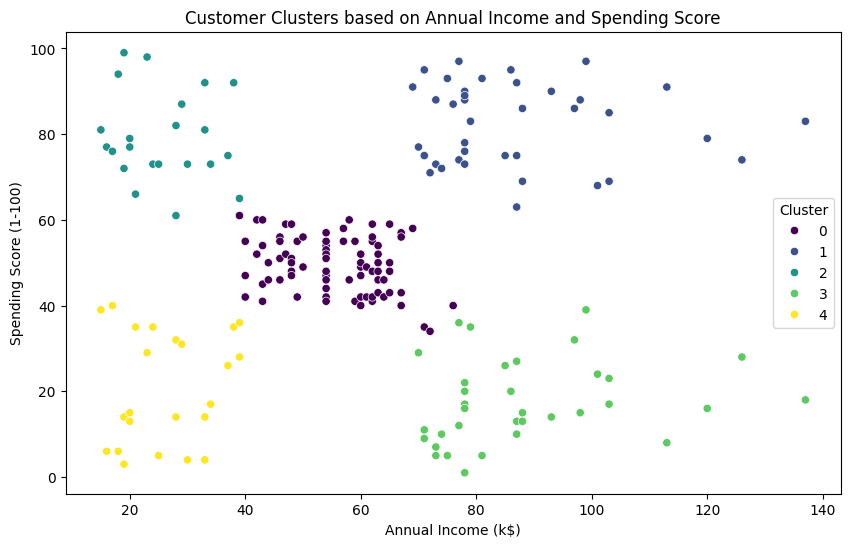

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=data, palette='viridis')
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

## Summary:

### Data Analysis Key Findings

*   'Annual Income (k\$)' and 'Spending Score (1-100)' were selected as suitable features for customer clustering.
*   The elbow method suggested that 5 is a reasonable number of clusters for the data.
*   Applying k-means with 5 clusters resulted in the following distinct customer segments based on average income and spending scores:
    *   Cluster 0: Average income, average spending.
    *   Cluster 1: High income, high spending.
    *   Cluster 2: Low income, high spending.
    *   Cluster 3: High income, low spending.
    *   Cluster 4: Low income, low spending.
*   A scatter plot visualizing the clusters confirmed the separation of these groups based on the selected features.

### Insights or Next Steps

*   These distinct customer segments can be used to tailor marketing strategies and product offerings to specific groups.
*   Further analysis could involve exploring other features or applying different clustering algorithms to potentially uncover more nuanced customer segments.


## Suggest Customer Engagement Strategies

### Subtask:
Suggest appropriate ways by which mall management can interact with their customers based on the clustering results from Task 3b.

**Reasoning**:
Based on the characteristics of each cluster identified in the previous step, suggest tailored customer engagement strategies.

**Customer Engagement Strategies based on Clustering (Task 3b):**

Based on the k-means clustering using 'Annual Income (k$)' and 'Spending Score (1-100)', we identified 5 distinct customer segments. Here are some suggested engagement strategies for each cluster:

*   **Cluster 0 (Average Income, Average Spending):**
    *   **Characteristics:** These customers represent the average mall goer.
    *   **Engagement:** Focus on general promotions, loyalty programs, and highlighting new store arrivals or events that appeal to a broad audience. Gather feedback to understand their evolving needs and preferences.

*   **Cluster 1 (High Income, High Spending):**
    *   **Characteristics:** These are the mall's most valuable customers. They have high purchasing power and spend frequently.
    *   **Engagement:** Offer exclusive deals, VIP events, personalized recommendations, and premium services. Implement a tiered loyalty program that rewards their high spending. Focus on building strong relationships and providing exceptional customer service.

*   **Cluster 2 (Low Income, High Spending):**
    *   **Characteristics:** These customers may be budget-conscious but are still high spenders at the mall. They might be looking for value or specific types of products/experiences.
    *   **Engagement:** Offer discounts, sales, and value- bundles. Highlight affordable options and promotions. Consider flexible payment options or layaway plans. Engage them through social media and community events.

*   **Cluster 3 (High Income, Low Spending):**
    *   **Characteristics:** These customers have high income but spend less at the mall. They might be spending their money elsewhere or only visit for specific needs.
    *   **Engagement:** Understand their reasons for low spending at the mall. Offer targeted promotions based on their interests (if known). Highlight high-end or luxury goods and services available at the mall. Provide information about exclusive events or new premium stores.

*   **Cluster 4 (Low Income, Low Spending):**
    *   **Characteristics:** These customers have limited income and low spending habits at the mall.
    *   **Engagement:** Focus on attracting them with essential goods and services, value-for-money options, and frequent sales. Consider partnerships with community programs or offering discounts to specific groups (e.g., students, seniors). Gather feedback to understand their needs and barriers to spending.

These strategies are a starting point and can be further refined by incorporating other customer data and conducting more in-depth analysis.